In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
#connection = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)




In [6]:
# reflect the tables
#columns = inspector.get_columns('measurement')
#for c in columns:
    #print(c['name'], c["type"])

In [7]:
# reflect the tables
#columns = inspector.get_columns('station')
#for c in columns:
    #print(c['name'], c["type"])

In [8]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
#reflect the tables
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#reflect the tables
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
# Find the most recent date in the data set.
dates = session.query(Measurement.date).order_by(Measurement.date.desc())
dates.first()

('2017-08-23')

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime(2016, 8, 23)
year_rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=date).all()
year_rain_df = pd.DataFrame(year_rain)
year_rain_df
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column



,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [26]:
date_precip_df = year_rain_df.set_index("date")
# Sort the dataframe by date
###sorted by date in the query


,prcp
date,
2016-09-14,6.70
2017-04-29,6.25
2017-02-11,5.04
2017-07-22,4.00
2016-10-04,3.46
...,...
2017-08-06,NaN
2017-08-11,NaN
2017-08-13,NaN


Text(0, 0.5, 'Precipitation')

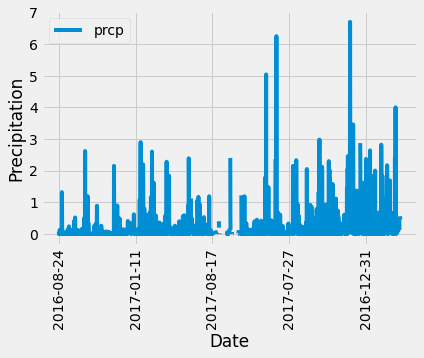

In [28]:
#index_ = [pd.to_datetime(date, format='%Y-%m-%d').date() 
        #for date in pd.date_range('2016, 8, 23', '2017, 8, 23', freq="M")]

# Use Pandas Plotting with Matplotlib to plot the data

date_precip_df.plot(rot = 90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
#ax = plt.axes()
#df2_.plot(ax=ax)
#ax.xaxis.grid(True)
#ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y'))
#labels = ax.get_xticklabels()
#plt.setp(labels, rotation=85, fontsize=8)
#plt.xticks

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [35]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Station.id.count()).group_by(Station.id).order_by(Station.id.desc())

AttributeError: Neither 'InstrumentedAttribute' object nor 'Comparator' object associated with station.id has an attribute 'count'

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
#session.close()